In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn # 인공 신경망 모델들 모아놓은 모듈
import torch.nn.functional as F #그중 자주 쓰이는것들을 F로
from torchvision import transforms, datasets
import cv2
import pandas as pd
import os
from glob import glob
import torchvision.models as models
import sys
import librosa, librosa.display
#from pytorchtools import EarlyStopping

'''
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
#DEVICE = torch.device('cpu')
print('Using Pytorch version : ',torch.__version__,' Device : ',DEVICE)'''

"\nif torch.cuda.is_available():\n    DEVICE = torch.device('cuda')\nelse:\n    DEVICE = torch.device('cpu')\n#DEVICE = torch.device('cpu')\nprint('Using Pytorch version : ',torch.__version__,' Device : ',DEVICE)"

In [ ]:
#3. 하이퍼 파라미터
BATCH_SIZE =  64 #한 배치당 32개 이미지데이터
EPOCHS = 20# 전체 데이터 셋을 40번 반복

In [ ]:
from torch.utils.data import random_split, DataLoader
from torchvision.datasets import ImageFolder
from sklearn.model_selection import train_test_split

train_data_dir='/content/drive/MyDrive/느티나무/train'
# Create the ImageFolder dataset
transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=(-30, 30)),
    #transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.4375, 0.5386, 0.3075),(0.2424, 0.2406, 0.2530))
])
dataset = ImageFolder(root=train_data_dir, transform=transform)

In [ ]:
test_data_dir = '/content/drive/MyDrive/느티나무/test'
transform_test = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the same size used in training
    transforms.ToTensor(),  # Convert to a tensor
    transforms.Normalize((0.4375, 0.5386, 0.3075), (0.2424, 0.2406, 0.2530))  # Normalize using the same mean and standard deviation as training
])
test_dataset = ImageFolder(root=test_data_dir, transform=transform_test)

test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8)

In [ ]:
import os
from PIL import Image

# Replace with your directory path
train_data_dir = '/content/drive/MyDrive/느티나무/train/healthy'

# Create a list of image files
image_files = [f for f in os.listdir(train_data_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]

# Count the number of image files
num_images = len(image_files)

print("Number of images:", num_images)

Number of images: 365


In [ ]:
import os
from PIL import Image

# Replace with your directory path
train_data_dir = '/content/drive/MyDrive/느티나무/train/disease'

# Create a list of image files
image_files = [f for f in os.listdir(train_data_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]

# Count the number of image files
num_images = len(image_files)

print("Number of images:", num_images)


In [ ]:
train_data_dir = '/content/drive/MyDrive/느티나무/test/healthy'

# Create a list of image files
image_files = [f for f in os.listdir(train_data_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]

# Count the number of image files
num_images = len(image_files)

print("Number of images:", num_images)

In [ ]:
train_data_dir = '/content/drive/MyDrive/느티나무/test/disease'

# Create a list of image files
image_files = [f for f in os.listdir(train_data_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]

# Count the number of image files
num_images = len(image_files)

print("Number of images:", num_images)

In [ ]:
classes=['disease','healthy']

def model_initialize():
    model = models.resnet18(pretrained=True)
    model.ftrs = model.fc.in_features
    num_ftrs = model.fc.in_features

    model.fc = nn.Sequential(nn.Linear(num_ftrs, len(classes)),
                            )

    model = model.cuda()
    return model
model=model_initialize()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 187MB/s]


In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.6/248.6 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00


In [ ]:
!wandb login #2760afae3cddc39355fd83d56a601147e18e1acf

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
import wandb
wandb.init(project='Plant')

# 실행 이름 설정
wandb.run.name = 'Resne18 Pretrained O + DataAug(Num X, Jitter, Affine X) + SGD '
wandb.run.save()

wandb: Currently logged in as: iuapink0522. Use `wandb login --relogin` to force relogin


wandb: WARNING Calling wandb.run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


True

In [ ]:
lr=0.0001
args = {
    "learning_rate": lr,
    "epochs": EPOCHS,
    "batch_size": BATCH_SIZE
}
wandb.config.update(args)

In [ ]:
#8. 학습
def train(model,train_loader,optimizer, log_interval):
    model.train()
    correct = 0
    train_loss = 0
    for batch_idx,(image,label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        #데이터들 장비에 할당
        optimizer.zero_grad() # device 에 저장된 gradient 제거
        output = model(image) # model로 output을 계산
        loss = criterion(output, label) #loss 계산
        train_loss += loss.item()
        prediction = output.max(1,keepdim=True)[1] # 가장 확률이 높은 class 1개를 가져온다.그리고 인덱스만
        correct += prediction.eq(label.view_as(prediction)).sum().item()# 아웃풋이 배치 사이즈 32개라서.
        loss.backward() # loss 값을 이용해 gradient를 계산
        optimizer.step() # Gradient 값을 이용해 파라미터 업데이트.
    train_loss/=len(train_loader.dataset)
    train_accuracy = 100. * correct / len(train_loader.dataset)
    return train_loss,train_accuracy

In [ ]:
#9. 학습 진행하며, validation 데이터로 모델 성능확인
def evaluate(model,valid_loader):
    model.eval()
    misclassified_images = []
    valid_loss = 0
    correct = 0
    #no_grad : 그래디언트 값 계산 막기.
    with torch.no_grad():
        for image, label in valid_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            valid_loss += criterion(output, label).item()
            prediction = output.max(1,keepdim=True)[1] # 가장 확률이 높은 class 1개를 가져온다.그리고 인덱스만
            correct += prediction.eq(label.view_as(prediction)).sum().item()# 아웃풋이 배치 사이즈 32개라서.
                        # Check for misclassified images
            for i in range(label.size(0)):
                if prediction[i] != label[i]:
                    misclassified_images.append((image[i], prediction[i], label[i]))

            #true.false값을 sum해줌. item
        valid_loss /= len(valid_loader.dataset)
        valid_accuracy = 100. * correct / len(valid_loader.dataset)
        return valid_loss,valid_accuracy,misclassified_images


In [ ]:
from sklearn.model_selection import StratifiedKFold

# Define the number of folds
n_splits = 5  # You can adjust this as needed

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Create lists to store results across folds
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

for fold, (train_index, valid_index) in enumerate(kf.split(dataset, dataset.targets)):
    train_dataset = torch.utils.data.Subset(dataset, train_index)
    valid_dataset = torch.utils.data.Subset(dataset, valid_index)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8)
    validation_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=8)

    best_valid_acc = 0  # Initialize the best validation accuracy for each fold

    for Epoch in range(1, EPOCHS + 1):
        train_loss, train_accuracy = train(model, train_loader, optimizer, log_interval=31)
        valid_loss, valid_accuracy,_ = evaluate(model, validation_loader)
        wandb.log({"Training loss": train_loss, "Train Acc": train_accuracy, "Val loss": valid_loss, "Val Acc": valid_accuracy})


        scheduler.step()

        print("\n[Fold {} | EPOCH:{}]\t Train Loss:{:.4f}\t Train Acc:{:.2f} %  | \tValid Loss:{:.4f} \tValid Acc: {:.2f} %\n".
            format(fold, Epoch, train_loss, train_accuracy, valid_loss, valid_accuracy))

        if valid_accuracy > best_valid_acc:
            best_valid_acc = valid_accuracy
            # Save the model if the validation accuracy improves

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_accuracy)

# Calculate and print the mean and standard deviation of metrics across folds
mean_train_loss = sum(train_losses) / n_splits
mean_train_accuracy = sum(train_accuracies) / n_splits
mean_valid_loss = sum(valid_losses) / n_splits
mean_valid_accuracy = sum(valid_accuracies) / n_splits

std_train_loss = (sum((x - mean_train_loss) ** 2 for x in train_losses) / n_splits) ** 0.5
std_train_accuracy = (sum((x - mean_train_accuracy) ** 2 for x in train_accuracies) / n_splits) ** 0.5
std_valid_loss = (sum((x - mean_valid_loss) ** 2 for x in valid_losses) / n_splits) ** 0.5
std_valid_accuracy = (sum((x - mean_valid_accuracy) ** 2 for x in valid_accuracies) / n_splits) ** 0.5

print("\nMean Train Loss:{:.4f} (± {:.4f})\tMean Train Acc:{:.2f} % (± {:.2f})".
      format(mean_train_loss, std_train_loss, mean_train_accuracy, std_train_accuracy))
print("Mean Valid Loss:{:.4f} (± {:.4f})\tMean Valid Acc:{:.2f} % (± {:.2f})".
      format(mean_valid_loss, std_valid_loss, mean_valid_accuracy, std_valid_accuracy))


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 0 | EPOCH:1]	 Train Loss:0.0094	 Train Acc:66.13 %  | 	Valid Loss:0.0094 	Valid Acc: 75.23 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (108675204 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 0 | EPOCH:2]	 Train Loss:0.0021	 Train Acc:95.85 %  | 	Valid Loss:0.0109 	Valid Acc: 74.31 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (106303995 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 0 | EPOCH:3]	 Train Loss:0.0011	 Train Acc:97.24 %  | 	Valid Loss:0.0053 	Valid Acc: 89.91 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 0 | EPOCH:4]	 Train Loss:0.0004	 Train Acc:99.31 %  | 	Valid Loss:0.0040 	Valid Acc: 93.58 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 0 | EPOCH:5]	 Train Loss:0.0002	 Train Acc:99.54 %  | 	Valid Loss:0.0038 	Valid Acc: 93.58 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (109053729 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 0 | EPOCH:6]	 Train Loss:0.0004	 Train Acc:99.31 %  | 	Valid Loss:0.0025 	Valid Acc: 97.25 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 0 | EPOCH:7]	 Train Loss:0.0001	 Train Acc:99.77 %  | 	Valid Loss:0.0029 	Valid Acc: 95.41 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 0 | EPOCH:8]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0030 	Valid Acc: 96.33 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (105350544 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 0 | EPOCH:9]	 Train Loss:0.0002	 Train Acc:99.54 %  | 	Valid Loss:0.0019 	Valid Acc: 97.25 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 0 | EPOCH:10]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0026 	Valid Acc: 93.58 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (104882988 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 0 | EPOCH:11]	 Train Loss:0.0002	 Train Acc:99.54 %  | 	Valid Loss:0.0023 	Valid Acc: 96.33 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 0 | EPOCH:12]	 Train Loss:0.0003	 Train Acc:99.54 %  | 	Valid Loss:0.0030 	Valid Acc: 92.66 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 0 | EPOCH:13]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0018 	Valid Acc: 95.41 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 0 | EPOCH:14]	 Train Loss:0.0001	 Train Acc:99.77 %  | 	Valid Loss:0.0012 	Valid Acc: 97.25 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 0 | EPOCH:15]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0016 	Valid Acc: 95.41 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 0 | EPOCH:16]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0010 	Valid Acc: 96.33 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (104074572 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 0 | EPOCH:17]	 Train Loss:0.0002	 Train Acc:99.54 %  | 	Valid Loss:0.0018 	Valid Acc: 94.50 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 0 | EPOCH:18]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0013 	Valid Acc: 94.50 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (102320330 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 0 | EPOCH:19]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0017 	Valid Acc: 95.41 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 0 | EPOCH:20]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0018 	Valid Acc: 96.33 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 1 | EPOCH:1]	 Train Loss:0.0003	 Train Acc:98.85 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 1 | EPOCH:2]	 Train Loss:0.0003	 Train Acc:98.85 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 1 | EPOCH:3]	 Train Loss:0.0001	 Train Acc:99.54 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (105066654 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 1 | EPOCH:4]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 1 | EPOCH:5]	 Train Loss:0.0001	 Train Acc:99.77 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (110914375 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 1 | EPOCH:6]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (106857659 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 1 | EPOCH:7]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 1 | EPOCH:8]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (102879275 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 1 | EPOCH:9]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 1 | EPOCH:10]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 1 | EPOCH:11]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 1 | EPOCH:12]	 Train Loss:0.0001	 Train Acc:99.77 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 1 | EPOCH:13]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (103741155 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 1 | EPOCH:14]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 1 | EPOCH:15]	 Train Loss:0.0001	 Train Acc:99.77 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 1 | EPOCH:16]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 1 | EPOCH:17]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 1 | EPOCH:18]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 1 | EPOCH:19]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 1 | EPOCH:20]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 2 | EPOCH:1]	 Train Loss:0.0001	 Train Acc:99.77 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (103120790 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 2 | EPOCH:2]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 2 | EPOCH:3]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 2 | EPOCH:4]	 Train Loss:0.0001	 Train Acc:99.77 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 2 | EPOCH:5]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (106062396 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 2 | EPOCH:6]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 2 | EPOCH:7]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (110758884 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 2 | EPOCH:8]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 2 | EPOCH:9]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 2 | EPOCH:10]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 2 | EPOCH:11]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 2 | EPOCH:12]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 2 | EPOCH:13]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 2 | EPOCH:14]	 Train Loss:0.0001	 Train Acc:99.77 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (106270790 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 2 | EPOCH:15]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 2 | EPOCH:16]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (110746664 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 2 | EPOCH:17]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 2 | EPOCH:18]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 2 | EPOCH:19]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 2 | EPOCH:20]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 3 | EPOCH:1]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 3 | EPOCH:2]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 3 | EPOCH:3]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 3 | EPOCH:4]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (103805675 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 3 | EPOCH:5]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (102547500 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 3 | EPOCH:6]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 3 | EPOCH:7]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (103639068 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 3 | EPOCH:8]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 3 | EPOCH:9]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 3 | EPOCH:10]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 3 | EPOCH:11]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 3 | EPOCH:12]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 3 | EPOCH:13]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 3 | EPOCH:14]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 3 | EPOCH:15]	 Train Loss:0.0001	 Train Acc:99.77 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (102047400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 3 | EPOCH:16]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (104354656 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 3 | EPOCH:17]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 3 | EPOCH:18]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (104286435 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 3 | EPOCH:19]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (103318445 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 3 | EPOCH:20]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 4 | EPOCH:1]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 4 | EPOCH:2]	 Train Loss:0.0001	 Train Acc:99.77 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 4 | EPOCH:3]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 4 | EPOCH:4]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (105932994 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 4 | EPOCH:5]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 4 | EPOCH:6]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 4 | EPOCH:7]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 4 | EPOCH:8]	 Train Loss:0.0001	 Train Acc:99.77 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (111608130 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 4 | EPOCH:9]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 4 | EPOCH:10]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (102321460 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 4 | EPOCH:11]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 4 | EPOCH:12]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 4 | EPOCH:13]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 4 | EPOCH:14]	 Train Loss:0.0001	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 4 | EPOCH:15]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 4 | EPOCH:16]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 4 | EPOCH:17]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 4 | EPOCH:18]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 4 | EPOCH:19]	 Train Loss:0.0001	 Train Acc:99.77 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (127401984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



[Fold 4 | EPOCH:20]	 Train Loss:0.0000	 Train Acc:100.00 %  | 	Valid Loss:0.0000 	Valid Acc: 100.00 %


Mean Train Loss:0.0000 (± 0.0000)	Mean Train Acc:100.00 % (± 0.00)
Mean Valid Loss:0.0004 (± 0.0007)	Mean Valid Acc:99.27 % (± 1.47)


In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import models
from skimage.io import imread
from skimage.transform import resize

In [ ]:
!pip install torchsummary


In [ ]:
class GradCamModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.gradients = None
        self.tensorhook = []
        self.layerhook = []
        self.selected_out = None

        #PRETRAINED MODEL
        self.pretrained = loaded_model
        self.layerhook.append(self.pretrained.layer4.register_forward_hook(self.forward_hook()))

        for p in self.pretrained.parameters():
            p.requires_grad = True

    def activations_hook(self,grad):
        self.gradients = grad

    def get_act_grads(self):
        return self.gradients

    def forward_hook(self):
        def hook(module, inp, out):
            self.selected_out = out
            self.tensorhook.append(out.register_hook(self.activations_hook))
        return hook

    def forward(self,x):
        out = self.pretrained(x)
        return out, self.selected_out

In [ ]:
gcmodel = GradCamModel().to('cpu')

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
img = imread('/content/drive/MyDrive/느티나무/train/disease/rkftoransmlqud_10.jpg') #'bulbul.jpg'
print(img.shape)
print(img.min(), img.max())
img = resize(img, (224,224), preserve_range = True)
img = np.expand_dims(img.transpose((2,0,1)),0)
img /= 255.0
print(img.shape)
print(img.min(), img.max())
mean = np.array([0.485, 0.456, 0.406]).reshape((1,3,1,1))
std = np.array([0.229, 0.224, 0.225]).reshape((1,3,1,1))
img = (img - mean)/std
inpimg = torch.from_numpy(img).to('cpu', torch.float32)

(476, 340, 3)
0 252
(1, 3, 224, 224)
2.051926117930572e-08 0.9841461968918553


In [ ]:
import torch

# Check the number of available GPUs
num_gpus = torch.cuda.device_count()

# Loop through each GPU
for gpu_id in range(num_gpus):
    gpu = torch.cuda.get_device_properties(gpu_id)
    print(f"GPU {gpu_id}: {gpu.name}")

    # Check GPU memory usage
    mem_alloc = torch.cuda.memory_allocated(device=gpu_id)
    mem_max_alloc = torch.cuda.max_memory_allocated(device=gpu_id)
    mem_cached = torch.cuda.memory_cached(device=gpu_id)
    mem_max_cached = torch.cuda.max_memory_cached(device=gpu_id)

    print(f"  Allocated Memory: {mem_alloc / 1e9:.2f} GB")
    print(f"  Max Allocated Memory: {mem_max_alloc / 1e9:.2f} GB")
    print(f"  Cached Memory: {mem_cached / 1e9:.2f} GB")
    print(f"  Max Cached Memory: {mem_max_cached / 1e9:.2f} GB")
    print()


<ipython-input-30-539947d38550>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('jet',256)


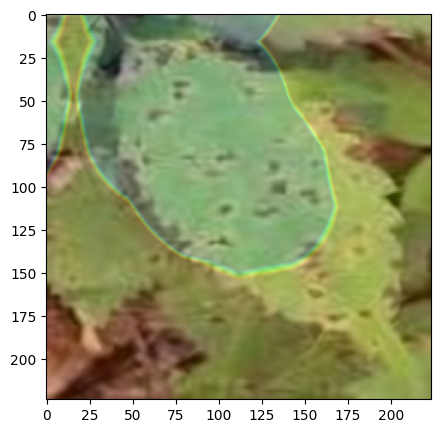

In [ ]:
out, acts = gcmodel(inpimg)
acts = acts.detach().cpu()
loss = nn.CrossEntropyLoss()(out,torch.from_numpy(np.array([1])).to('cpu'))
loss.backward()

grads = gcmodel.get_act_grads().detach().cpu()

pooled_grads = torch.mean(grads, dim=[0,2,3]).detach().cpu()

for i in range(acts.shape[1]):
    acts[:,i,:,:] *= pooled_grads[i]
heatmap_j = torch.mean(acts, dim = 1).squeeze()
heatmap_j = heatmap_j.cpu().numpy()
heatmap_j_max = heatmap_j.max(axis = 0)[0]
heatmap_j /= heatmap_j_max



heatmap_j = resize(heatmap_j,(224,224),preserve_range=True)

cmap = mpl.cm.get_cmap('jet',256)
heatmap_j2 = cmap(heatmap_j,alpha = 0.2)

fig, axs = plt.subplots(1,1,figsize = (5,5))
axs.imshow((img*std+mean)[0].transpose(1,2,0))
axs.imshow(heatmap_j2)
plt.show()

In [ ]:
 _,test_accuracy,misclassified_images = evaluate(model, test_loader)

In [ ]:
# Print the misclassified images and display them
for image, predicted_label, true_label in misclassified_images:
    print(f"Predicted: {predicted_label}, True: {true_label}")

    # Reshape the image tensor and convert it to a NumPy array  # Reshape the image tensor (C, H, W) to (H, W, C)
    image_cpu = image.cpu()  # Move the tensor from GPU to CPU
    image_numpy = image_cpu.permute(1, 2, 0).numpy()

    plt.imshow(image_numpy)
    plt.title(f"Predicted: {predicted_label}, True: {true_label}")
    plt.show()

In [ ]:
print(test_accuracy)

100.0
